In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [52]:
csv = "Air_Pollution_Dataset_sorted_with_aqi_cat.csv"
data = pd.read_csv(csv)

In [53]:
data

,motorcycle,autorickshaw,car,truck,bus,caravan,temp,humidity,visibility,pm2_5,pm10,aqi,date,hour,aqi_cat
0,0,2,6,0,0,NaN,35.329556,28.640276,22.043362,62,73,106.67,2021-01-11 11:32:35,11,2
1,1,1,2,0,1,NaN,34.855375,29.103499,15.059498,65,73,116.67,2021-01-11 11:33:11,11,2
2,1,2,0,2,0,NaN,33.069651,31.526076,16.562999,70,78,133.33,2021-01-11 11:33:46,11,2
3,1,0,1,1,0,NaN,32.519817,32.181193,14.087606,145,198,319.23,2021-01-11 11:34:21,11,4
4,0,1,3,0,1,NaN,31.838834,33.519519,14.261219,71,85,136.67,2021-01-11 11:34:55,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,0,1,0,0,0,NaN,36.742026,43.910649,24.209147,15,19,25.00,2021-09-09 16:48:38,16,0
3163,1,3,1,1,0,NaN,36.802561,43.701478,24.052376,11,17,18.33,2021-09-09 16:49:13,16,0
3164,1,0,2,0,0,NaN,36.192169,43.509552,21.312520,12,18,20.00,2021-09-09 16:49:48,16,0
3165,0,0,2,0,0,NaN,36.626001,43.629526,15.117101,17,20,28.33,2021-09-09 16:50:23,16,0


In [ ]:
def categorize_aqi(aqi_value):
    if 0 <= aqi_value <= 50:
        return 0
    if 51 <= aqi_value <= 100:
        return 1
    if 101 <= aqi_value <= 200:
        return 2
    if 201 <= aqi_value <= 300:
        return 3
    if 301 <= aqi_value <= 400:
        return 4

(array([1251.,  805.,  577.,  364.,  170.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

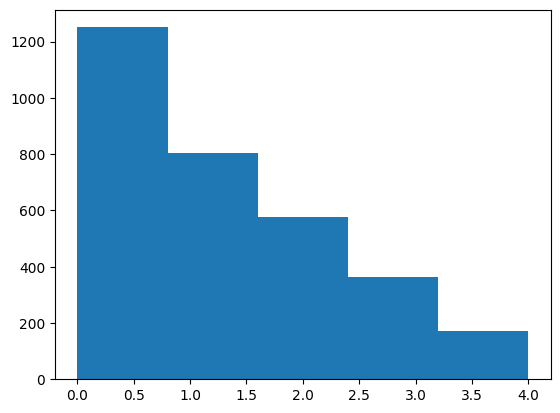

In [54]:
plt.hist(data["aqi_cat"], histtype='bar', bins=5)

In [55]:
data_features = data[['motorcycle', 'autorickshaw', 'car', 'truck', 'bus', 'temp', 'humidity']].copy()


In [56]:
labels = data["aqi_cat"].copy()
labels.apply(lambda x: float(x))


0       2.0
1       2.0
2       2.0
3       4.0
4       2.0
       ... 
3162    0.0
3163    0.0
3164    0.0
3165    0.0
3166    0.0
Name: aqi_cat, Length: 3167, dtype: float64

In [57]:
data_feat_np = data_features.values
labels_np = labels.values.astype(int)
print(data_feat_np.shape)
print(labels.shape)

(3167, 7)
(3167,)


In [ ]:
# min_max_scaler = MinMaxScaler()
# data_feat_np = min_max_scaler.fit_transform(data_feat_np)

In [58]:
data_feat_np

array([[ 0.        ,  2.        ,  6.        , ...,  0.        ,
        35.32955598, 28.64027583],
       [ 1.        ,  1.        ,  2.        , ...,  1.        ,
        34.85537461, 29.10349908],
       [ 1.        ,  2.        ,  0.        , ...,  0.        ,
        33.06965084, 31.52607568],
       ...,
       [ 1.        ,  0.        ,  2.        , ...,  0.        ,
        36.1921691 , 43.50955238],
       [ 0.        ,  0.        ,  2.        , ...,  0.        ,
        36.62600114, 43.62952592],
       [ 1.        ,  2.        ,  6.        , ...,  0.        ,
        36.64113486, 43.72518163]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data_feat_np, labels, test_size=0.2, random_state=42)
print("Train Data Shape", X_train.shape)
print("Test Data Shape", X_test.shape)

Train Data Shape (2533, 7)
Test Data Shape (634, 7)


In [60]:
# prompt: Ensure that all aqi types are there from 0,4. if not there then add one element from train to test, even if it requires duplicates

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# labels.apply(lambda x: int(x))

# data_feat_np = data_features.values
# labels_np = labels.values.astype(int)


# Ensure all AQI categories (0-4) are present in the test set
for i in range(5):
    if i not in y_test.unique():
        # Find an index in the training set with the missing category
        train_indices = np.where(y_train == i)[0]
        if len(train_indices)>0:
            idx = train_indices[0]
            # Add the corresponding sample from training to testing
            X_test = np.vstack([X_test, X_train[idx]])
            y_test = pd.concat([y_test, pd.Series([y_train.iloc[idx]])])

            # Remove the added sample from the training set to avoid duplicates in both sets.
          #  X_train = np.delete(X_train, idx, axis=0)
        #    y_train = y_train.drop(index=y_train.index[idx])
        else:
            print(f"Warning: Category {i} not found in training or test set.")

print("Train Data Shape", X_train.shape)
print("Test Data Shape", X_test.shape)
print(np.unique(y_test))

Train Data Shape (2533, 7)
Test Data Shape (634, 7)
[0 1 2 3 4]


In [61]:
# check class count of y train and y test
print(y_train.value_counts())
print(y_test.value_counts())
#manipulate test data to have one item of each type


aqi_cat
0    996
1    665
2    433
3    299
4    140
Name: count, dtype: int64
aqi_cat
0    255
2    144
1    140
3     65
4     30
Name: count, dtype: int64


In [62]:

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(f"Accuracy of the k-Nearest Neighbors Classifier: {knn_model.score(X_test, y_test)}.")

Accuracy of the k-Nearest Neighbors Classifier: 0.7018927444794952.


In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, learning_rate='adaptive')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Severe']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Good       0.85      0.96      0.90       252
Satisfactory       0.50      0.60      0.54       145
    Moderate       0.56      0.38      0.45       130
        Poor       0.31      0.37      0.34        62
      Severe       0.50      0.03      0.06        34

    accuracy                           0.65       623
   macro avg       0.54      0.47      0.46       623
weighted avg       0.64      0.65      0.62       623



              precision    recall  f1-score   support

        Good       0.94      0.96      0.95       255
Satisfactory       0.57      0.79      0.66       140
    Moderate       0.59      0.50      0.54       144
        Poor       0.44      0.29      0.35        65
      Severe       0.25      0.10      0.14        30

    accuracy                           0.71       634
   macro avg       0.56      0.53      0.53       634
weighted avg       0.69      0.71      0.69       634



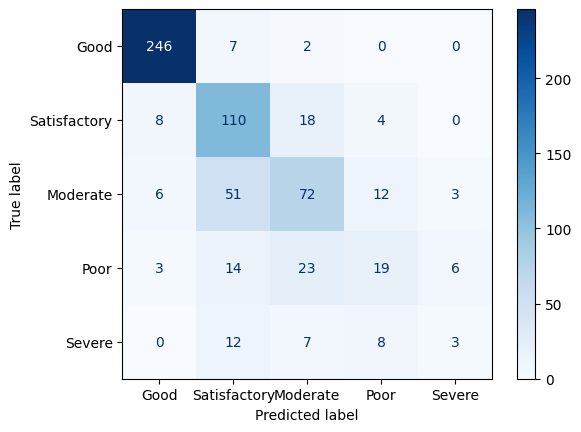

In [63]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Severe']

report = classification_report(y_test, y_pred, target_names=target_names)
print(report)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')

              precision    recall  f1-score   support

        Good       0.95      0.97      0.96       255
Satisfactory       0.61      0.79      0.69       140
    Moderate       0.58      0.53      0.55       144
        Poor       0.44      0.31      0.36        65
      Severe       0.53      0.30      0.38        30

    accuracy                           0.73       634
   macro avg       0.62      0.58      0.59       634
weighted avg       0.72      0.73      0.72       634



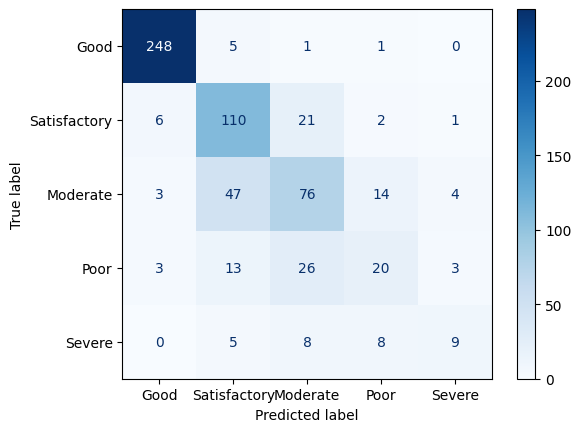

In [64]:
param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_depth': [None, 15, 25],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_rf_model.predict(X_test)

# Define target names for classification report
target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor','Severe']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix and display it
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')

# Show the plot
plt.show()

In [ ]:
!pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 3.20.2 which is incompatible.


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
# prompt: create a pipeline with minmaxscaler then best rf model  , save to onnx

import skl2onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

# Assuming 'best_rf_model' and 'min_max_scaler' are defined from your previous code

# Define the input shape for the ONNX model
initial_type = [('float_input', FloatTensorType([None, 7]))]

# Convert the scikit-learn pipeline to ONNX
onx = convert_sklearn(best_rf_model, initial_types=initial_type)

# Save the ONNX model to a file
with open("rf_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

Prediction: 2, Actual: 1.0
X_test[0]: [ 5.          0.          6.          0.          2.         32.04714536
 31.32930277]
Prediction: 1, Actual: 1.0
Prediction: 2, Actual: 3.0
X_test[2]: [ 0.          1.          4.          0.          1.         28.20370258
 40.3710741 ]
Prediction: 1, Actual: 1.0
Prediction: 2, Actual: 2.0
X_test[4]: [ 4.          0.          1.          5.          1.         29.31626083
 37.21187226]
Prediction: 2, Actual: 2.0
X_test[5]: [ 6.          2.          5.          0.          0.         42.02570978
 21.84194844]
Prediction: 2, Actual: 1.0
X_test[6]: [ 0.          0.          0.          0.          0.         30.37320422
 35.91351002]
Prediction: 2, Actual: 2.0
X_test[7]: [ 0.          0.          0.          2.          0.         30.71709285
 32.34314584]
Prediction: 1, Actual: 1.0
Prediction: 1, Actual: 1.0
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         1
Satisfactory       0.60      0.78

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


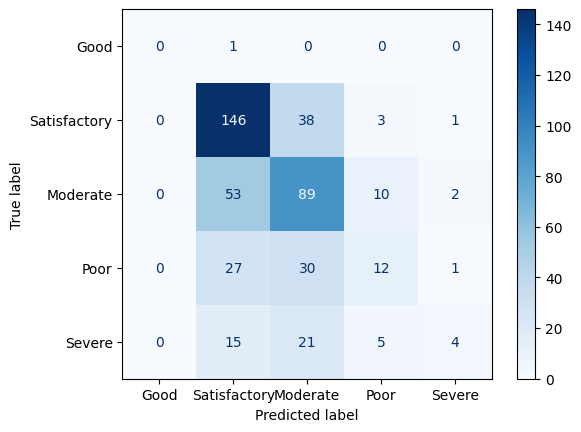

In [ ]:
# prompt: load the model and run the test cases on it

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import onnxruntime as rt
from sklearn.preprocessing import MinMaxScaler


# Load the ONNX model
sess = rt.InferenceSession("rf_model.onnx")

# Load the test data (assuming X_test and y_test are available from the previous code)
# ... (Your code to load X_test and y_test) ...

# Assuming you have X_test and y_test from your previous code
# Example: Assuming X_test and y_test are numpy arrays
# If they are pandas DataFrames, convert them to NumPy arrays using .values

# Preprocess the test data (using the same scaler used during training)
# min_max_scaler = MinMaxScaler()  # Initialize the scaler if it's not already loaded
# X_test = min_max_scaler.transform(X_test)


# Get the input name from the model's input metadata
input_name = sess.get_inputs()[0].name

# Run inference on the test data
y_pred_onnx = sess.run(None, {input_name: X_test.astype(np.float32)})[0]

#print the names of some x tests whose predictions are something other than satisfactory
for i in range(10):
    print(f"Prediction: {y_pred_onnx[i]}, Actual: {y_test.iloc[i]}")
    if y_pred_onnx[i] != 1:
        print(f"X_test[{i}]: {X_test[i]}")

#evaluate a singular array [ 4.          0.          1.          5.          1.         29.31626083 37.21187226]



# Evaluate the ONNX model
target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Severe']
print(classification_report(y_test, y_pred_onnx, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_onnx)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
# prompt: use the onnx model, do a sample inference on a single input

import numpy as np
import onnxruntime as rt

# Load the ONNX model
sess = rt.InferenceSession("rf_model.onnx")

# Sample input (replace with your actual input)
sample_input = np.array([[2.0, 1.0, 6.0, 0.0, 0.0, 35.31626083, 28.21187226]], dtype=np.float32)

# Get the input name from the model's input metadata
input_name = sess.get_inputs()[0].name

# Run inference on the sample input
output = sess.run(None, {input_name: sample_input})

# Print the prediction
print(f"Prediction for sample input: {output[0]}")

Prediction for sample input: [2]


In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the neural network model
def create_model(optimizer='adam', dropout_rate=0.0, hidden_units=64):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units // 2, activation='relu'))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer with softmax activation

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0,dropout_rate=0.0,hidden_units=32)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.0, 0.3, 0.5],
    'hidden_units': [32, 64, 128],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions on the test data
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Severe']
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
!pip install tensorflow-decision-forests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 73.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Load data into TensorFlow format
# Convert X_train and y_train to DataFrame
X_train_df = pd.DataFrame(X_train)  # Create DataFrame from X_train
y_train_df = pd.DataFrame(y_train, columns=['label'])  # Create DataFrame for y_train with a column name

# Combine X_train and y_train DataFrames
train_df = pd.concat([X_train_df, y_train_df], axis=1)

# Repeat for the test set
X_test_df = pd.DataFrame(X_test)  # Create DataFrame from X_test
y_test_df = pd.DataFrame(y_test, columns=['label'])  # Create DataFrame for y_test with a column name

# Combine X_test and y_test DataFrames
test_df = pd.concat([X_test_df, y_test_df], axis=1)

# Ensure all column names are strings
train_df.columns = train_df.columns.astype(str)
test_df.columns = test_df.columns.astype(str)

# Now, you can convert them to TensorFlow datasets
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="label")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="label")

# Create and train the RandomForest model
rf_model = tfdf.keras.RandomForestModel()
rf_model.fit(train_dataset)

# Evaluate the model
evaluation = rf_model.evaluate(test_dataset)

# Predict using the trained model
y_pred = rf_model.predict(test_dataset)

# Classification report using scikit-learn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=target_names))

# Confusion matrix display
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')


Use /tmp/tmp4navaydc as temporary training directory
Reading training dataset...
Training dataset read in 0:00:07.039953. Found 1823 examples.
Training model...
Model trained in 0:00:00.116151
Compiling model...
Model compiled.
1/1 [==============================] - 0s 42ms/step


ValueError: Found input variables with inconsistent numbers of samples: [458, 817]